# **Data visualization for TCPOSS Dataset**
***  
This .ipynb file is the visualization for TCPOSS Dataset, which is packed into several .hdf5 files since the raw data are difficult to use. Here in this .ipynb, we present our .hdf5 files' structure with examples for each level of difficulties.

The file is constructed as follows:
$\\$
    $\qquad$**[1. Data Overview](#data-overview):** The structure of .hdf5 file and examples for each classes.
$\\$
    $\qquad$**[ 1.1 Visualize the Data of Selected Labels](#visualize-the-data-of-selected-labels)**
$\\$
    $\qquad$**[ 1.2 Visualize the Data of Selected Sample](#visualize-the-data-of-selected-sample)**
$\\$
    $\qquad$**[2. Data in Different Divisions](#data-in-different-divisions):** The examples of different data divisions.
$\\$
    $\qquad$**[3. Toolbox](#toolbox):** Some helpful codes for personalized use:
$\\$
    $\qquad$**[ 3.1 Reshape Data](#reshape-data)**
$\\$
    $\qquad$**[ 3.2 Train a Net](#train-a-net)**  
    

<strong><font color=red>Attention:</font></strong> The images in .hdf5 files are stored in **"RGB"** format, while **cv2.imread** and **cv2.imwrite** functions will read and write images in **"BGR"** format by default. Funtion **plt.imshow** will maintain **"RGB"**

## **Data Overview**
***  

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

hdf5_path = "./h5py"

label_name = {0:"Asphalt", 1:"Grass", 2:"Cement",\
               3:"Board", 4:"Brick", 5:"Gravel", 6:"Sand", 7:"Flagstone", 8:"Plastic", 9:"Soil"}
print(label_name)

{0: 'Asphalt', 1: 'Grass', 2: 'Cement', 3: 'Board', 4: 'Brick', 5: 'Gravel', 6: 'Sand', 7: 'Flagstone', 8: 'Plastic', 9: 'Soil'}


Directory Structure:
images
images/images
labels
labels/labels
timeStamps
timeStamps/timeStamps


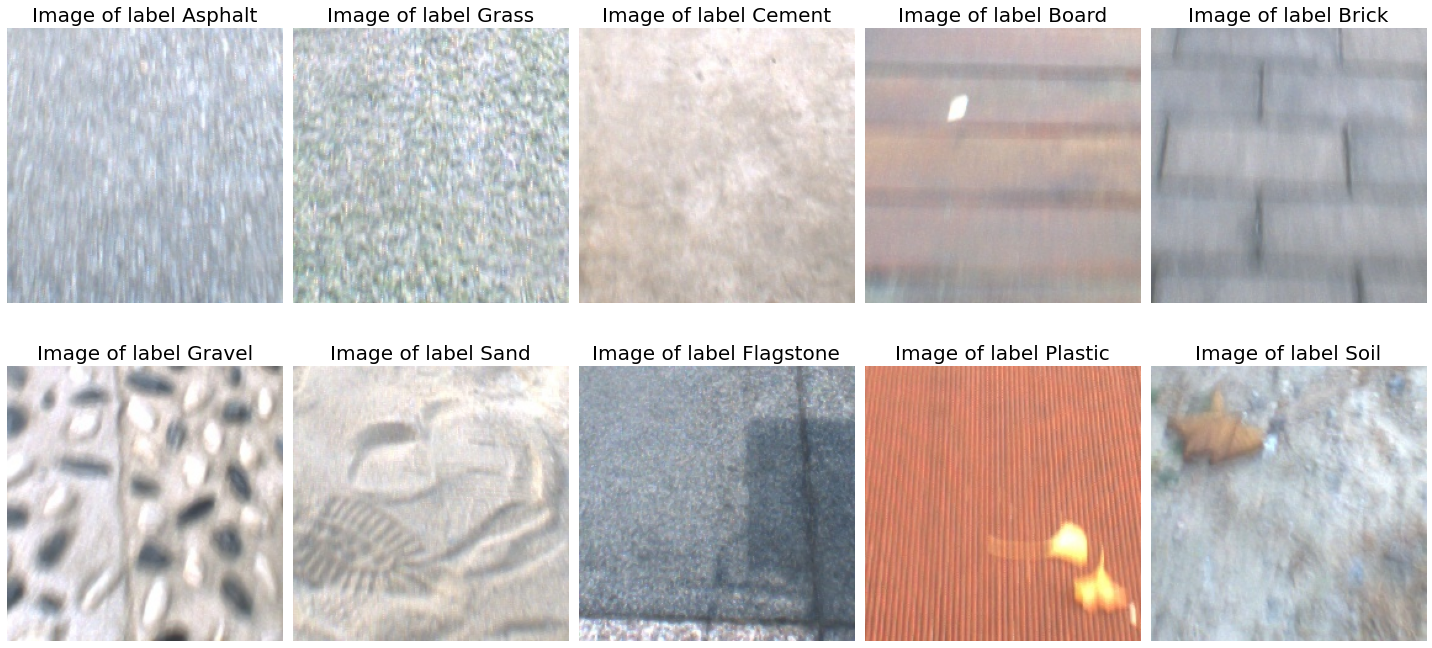

In [4]:
# Open the HDF5 file
file_path = hdf5_path + '/train_entry.hdf5'


with h5py.File(file_path, 'r') as file:
    # Image group in the file
    group_name = "images"
    group = file[group_name]
    
    # Image dataset in the group
    dataset_name = "images"
    dataset = group[dataset_name]

    # Print the directory structure
    print("Directory Structure:")
    file.visit(print)

    # Subplots config
    label_num = 0
    num_images = len(dataset)
    num_cols = 5
    num_rows = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,10))
    
    # Plot the first image of each label in the dataset
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            for s in range(num_images):
                if index < num_images:
                    tmp_group = file["labels"]
                    tmp_dataset = tmp_group["labels"]
                    if tmp_dataset[s] == label_num:
                        axs[i, j].imshow(dataset[s].reshape(224,224,3)/255.0)
                        axs[i, j].set_title(f"Image of label {label_name[label_num]}",fontsize=20)
                        axs[i, j].axis('off')
                        label_num += 1
                        break
        if label_num > 9:
            break
    
    plt.tight_layout()
    # print(f"{fig.figure.get_size_inches()} inches")
    plt.show()

### **Visualize the Data of Selected Labels**

Dataset size: 1496
Selected label: Asphalt
The Selected label has 196 images


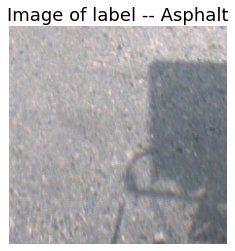

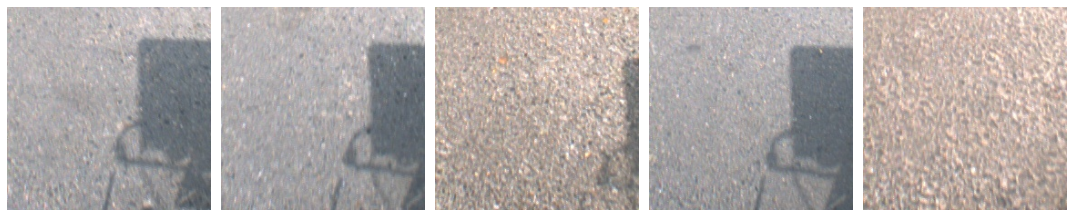

In [ ]:
# Open the HDF5 file
file_path = './h5py/test_easy.hdf5'

with h5py.File(file_path, 'r') as file:
    # Get image datas
    group_name = "images"
    group = file[group_name]
    dataset_name = "images"
    images = group[dataset_name]

    # Get label datas
    group_name = "labels"
    group = file[group_name]
    dataset_name = "labels"
    labels = group[dataset_name]

    # Print basic information of the dataset
    print(f"Dataset size: {len(images)}")

    # Select a label
    selected_label = 0 # 0-asphalt 1-grass 2-cement 3-board 4-brick 5-gravel 6-sand 7-flagstone 8-plastic 9-soil
    print(f"Selected label: {label_name[selected_label]}")
    
    # Get images of the selected label
    labels = np.array(labels)
    masks = (labels == selected_label)
    images_selected = np.array(images)[masks]
    print(f"The Selected label has {len(images_selected)} images")

    # Plot first of the selected label
    plt.imshow(images_selected[0].reshape(224,224,3)/255.0)
    plt.axis('off')
    plt.title(f"Image of label -- {label_name[selected_label]}",fontsize=18)
    plt.show()

    # Plot 5 images of the selected label
    fig, axs = plt.subplots(1, 5, figsize=(15,15))
    for i in range(5):
        axs[i].imshow(images_selected[len(images_selected)//5 * i].reshape(224,224,3)/255.0)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()
    

### **Visualize the Data of Selected Sample**

Dataset size: 1496


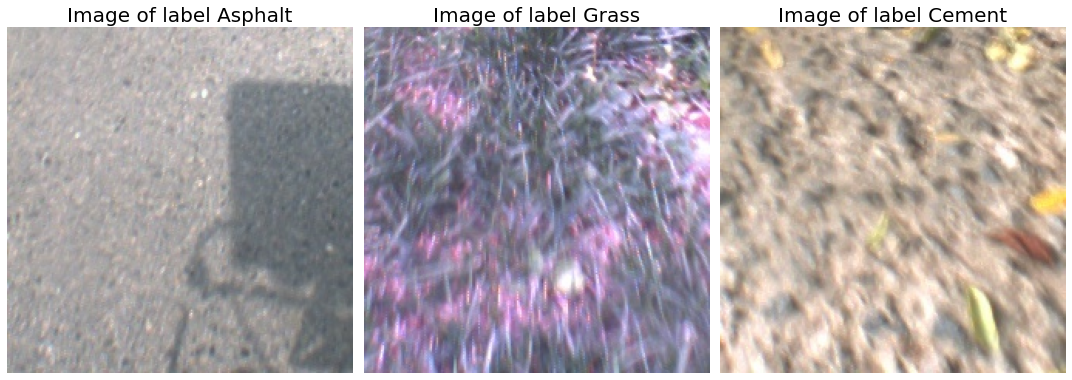

In [ ]:
# Open the HDF5 file
file_path = './h5py/test_easy.hdf5'


with h5py.File(file_path, 'r') as file:
    # Get image datas
    group_name = "images"
    group = file[group_name]
    dataset_name = "images"
    images = group[dataset_name]

    # Subplots config
    sample_idx = [105,210,404] # Samples selected, whose length should equal to num_cols * num_rows
    num_images = len(dataset)
    print(f"Dataset size: {num_images}")

    # Plot the selected images
    num_cols = 3 # Columns
    num_rows = 1 # Rows
    label_idx = file['labels']['labels']
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,15))
    # If num_rows or num_cols is 1, make axs a 2D array for consistent indexing
    if num_rows == 1:
        axs = axs[np.newaxis, :]
    if num_cols == 1:
        axs = axs[:, np.newaxis]
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            # Plot the image of selected index in the dataset
            axs[i, j].imshow(images[sample_idx[index]].reshape(224,224,3)/255.0)
            axs[i, j].set_title(f"Image of label {label_name[label_idx[sample_idx[index]]]}",fontsize=20)
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

## **Data in Different Divisions**
***  


In [5]:
# Config
modes = ["entry", "easy", "medium", "hard"]
hdf5_path = "./h5py"
label_name = {0:"Asphalt", 1:"Grass", 2:"Cement",\
               3:"Board", 4:"Brick", 5:"Gravel", 6:"Sand", 7:"Flagstone", 8:"Plastic", 9:"Soil"}


In [ ]:
for mode in modes[1:]:
    train_path = hdf5_path + "/train_"+mode+".hdf5"
    test_path = hdf5_path + "/test_"+mode+".hdf5"
    with h5py.File(train_path, 'r') as file:
        # Image group in the file
        group_name = "images"
        group = file[group_name]
        
        # Image dataset in the group
        dataset_name = "images"
        dataset = group[dataset_name]

        # Subplots config
        label_num = 0
        num_images = len(dataset)
        num_cols = 5
        num_rows = 2

        fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,10))
        plt.suptitle(f"{mode} division: train set", fontsize=24)        

        if mode == "entry":
            # entry mode is randomly split
            pass
        elif mode == "easy":
            axs[0, 0].imshow(dataset[406].reshape(224,224,3)/255.0)
            axs[0, 0].set_title(f"Image of label {label_name[0]}",fontsize=20)
            axs[0, 0].axis('off')

            axs[0, 1].imshow(dataset[1104].reshape(224,224,3)/255.0)
            axs[0, 1].set_title(f"Image of label {label_name[1]}",fontsize=20)
            axs[0, 1].axis('off')

            axs[0, 2].imshow(dataset[2061].reshape(224,224,3)/255.0)
            axs[0, 2].set_title(f"Image of label {label_name[2]}",fontsize=20)
            axs[0, 2].axis('off')

            axs[0, 3].imshow(dataset[2698].reshape(224,224,3)/255.0)
            axs[0, 3].set_title(f"Image of label {label_name[3]}",fontsize=20)
            axs[0, 3].axis('off')

            axs[0, 4].imshow(dataset[2850].reshape(224,224,3)/255.0)
            axs[0, 4].set_title(f"Image of label {label_name[4]}",fontsize=20)
            axs[0, 4].axis('off')

            axs[1, 0].imshow(dataset[3310].reshape(224,224,3)/255.0)
            axs[1, 0].set_title(f"Image of label {label_name[5]}",fontsize=20)
            axs[1, 0].axis('off')

            axs[1, 1].imshow(dataset[3397].reshape(224,224,3)/255.0)
            axs[1, 1].set_title(f"Image of label {label_name[6]}",fontsize=20)
            axs[1, 1].axis('off')

            axs[1, 2].imshow(dataset[3551].reshape(224,224,3)/255.0)
            axs[1, 2].set_title(f"Image of label {label_name[7]}",fontsize=20)
            axs[1, 2].axis('off')

            axs[1, 3].imshow(dataset[4668].reshape(224,224,3)/255.0)
            axs[1, 3].set_title(f"Image of label {label_name[8]}",fontsize=20)
            axs[1, 3].axis('off')

            axs[1, 4].imshow(dataset[5685].reshape(224,224,3)/255.0)
            axs[1, 4].set_title(f"Image of label {label_name[9]}",fontsize=20)
            axs[1, 4].axis('off')
        elif mode == "medium":
            axs[0, 0].imshow(dataset[0].reshape(224,224,3)/255.0)
            axs[0, 0].set_title(f"Image of label {label_name[0]}",fontsize=20)
            axs[0, 0].axis('off')

            axs[0, 1].imshow(dataset[895].reshape(224,224,3)/255.0)
            axs[0, 1].set_title(f"Image of label {label_name[1]}",fontsize=20)
            axs[0, 1].axis('off')

            axs[0, 2].imshow(dataset[1647].reshape(224,224,3)/255.0)
            axs[0, 2].set_title(f"Image of label {label_name[2]}",fontsize=20)
            axs[0, 2].axis('off')

            axs[0, 3].imshow(dataset[2179].reshape(224,224,3)/255.0)
            axs[0, 3].set_title(f"Image of label {label_name[3]}",fontsize=20)
            axs[0, 3].axis('off')

            axs[0, 4].imshow(dataset[2258].reshape(224,224,3)/255.0)
            axs[0, 4].set_title(f"Image of label {label_name[4]}",fontsize=20)
            axs[0, 4].axis('off')

            axs[1, 0].imshow(dataset[2786].reshape(224,224,3)/255.0)
            axs[1, 0].set_title(f"Image of label {label_name[5]}",fontsize=20)
            axs[1, 0].axis('off')

            axs[1, 1].imshow(dataset[2873].reshape(224,224,3)/255.0)
            axs[1, 1].set_title(f"Image of label {label_name[6]}",fontsize=20)
            axs[1, 1].axis('off')

            axs[1, 2].imshow(dataset[3027].reshape(224,224,3)/255.0)
            axs[1, 2].set_title(f"Image of label {label_name[7]}",fontsize=20)
            axs[1, 2].axis('off')

            axs[1, 3].imshow(dataset[4067].reshape(224,224,3)/255.0)
            axs[1, 3].set_title(f"Image of label {label_name[8]}",fontsize=20)
            axs[1, 3].axis('off')

            axs[1, 4].imshow(dataset[5000].reshape(224,224,3)/255.0)
            axs[1, 4].set_title(f"Image of label {label_name[9]}",fontsize=20)
            axs[1, 4].axis('off')
        else:
            axs[0, 0].imshow(dataset[0].reshape(224,224,3)/255.0)
            axs[0, 0].set_title(f"Image of label {label_name[0]}",fontsize=20)
            axs[0, 0].axis('off')

            axs[0, 1].imshow(dataset[895].reshape(224,224,3)/255.0)
            axs[0, 1].set_title(f"Image of label {label_name[1]}",fontsize=20)
            axs[0, 1].axis('off')

            axs[0, 2].imshow(dataset[1664].reshape(224,224,3)/255.0)
            axs[0, 2].set_title(f"Image of label {label_name[2]}",fontsize=20)
            axs[0, 2].axis('off')

            axs[0, 3].imshow(dataset[2258].reshape(224,224,3)/255.0)
            axs[0, 3].set_title(f"Image of label {label_name[3]}",fontsize=20)
            axs[0, 3].axis('off')

            axs[0, 4].imshow(dataset[2337].reshape(224,224,3)/255.0)
            axs[0, 4].set_title(f"Image of label {label_name[4]}",fontsize=20)
            axs[0, 4].axis('off')

            axs[1, 0].imshow(dataset[2805].reshape(224,224,3)/255.0)
            axs[1, 0].set_title(f"Image of label {label_name[5]}",fontsize=20)
            axs[1, 0].axis('off')

            axs[1, 1].imshow(dataset[2920].reshape(224,224,3)/255.0)
            axs[1, 1].set_title(f"Image of label {label_name[6]}",fontsize=20)
            axs[1, 1].axis('off')

            axs[1, 2].imshow(dataset[3900].reshape(224,224,3)/255.0)
            axs[1, 2].set_title(f"Image of label {label_name[7]}",fontsize=20)
            axs[1, 2].axis('off')

            axs[1, 3].imshow(dataset[4033].reshape(224,224,3)/255.0)
            axs[1, 3].set_title(f"Image of label {label_name[8]}",fontsize=20)
            axs[1, 3].axis('off')

            axs[1, 4].imshow(dataset[4910].reshape(224,224,3)/255.0)
            axs[1, 4].set_title(f"Image of label {label_name[9]}",fontsize=20)
            axs[1, 4].axis('off')
        
        plt.tight_layout()
        # print(f"{fig.figure.get_size_inches()} inches")
        plt.show()

        with h5py.File(test_path, 'r') as file:
            # Image group in the file
            group_name = "images"
            group = file[group_name]
            
            # Image dataset in the group
            dataset_name = "images"
            dataset = group[dataset_name]

            # Subplots config
            label_num = 0
            num_images = len(dataset)
            num_cols = 5
            num_rows = 2

            fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,10))
            plt.suptitle(f"{mode} division: test set", fontsize=24)

            if mode == "entry":
                pass
            elif mode == "easy":
                axs[0, 0].imshow(dataset[0].reshape(224,224,3)/255.0)
                axs[0, 0].set_title(f"Image of label {label_name[0]}",fontsize=20)
                axs[0, 0].axis('off')

                axs[0, 1].imshow(dataset[197].reshape(224,224,3)/255.0)
                axs[0, 1].set_title(f"Image of label {label_name[1]}",fontsize=20)
                axs[0, 1].axis('off')

                axs[0, 2].imshow(dataset[436].reshape(224,224,3)/255.0)
                axs[0, 2].set_title(f"Image of label {label_name[2]}",fontsize=20)
                axs[0, 2].axis('off')

                axs[0, 3].imshow(dataset[600].reshape(224,224,3)/255.0)
                axs[0, 3].set_title(f"Image of label {label_name[3]}",fontsize=20)
                axs[0, 3].axis('off')

                axs[0, 4].imshow(dataset[650].reshape(224,224,3)/255.0)
                axs[0, 4].set_title(f"Image of label {label_name[4]}",fontsize=20)
                axs[0, 4].axis('off')

                axs[1, 0].imshow(dataset[808].reshape(224,224,3)/255.0)
                axs[1, 0].set_title(f"Image of label {label_name[5]}",fontsize=20)
                axs[1, 0].axis('off')

                axs[1, 1].imshow(dataset[862].reshape(224,224,3)/255.0)
                axs[1, 1].set_title(f"Image of label {label_name[6]}",fontsize=20)
                axs[1, 1].axis('off')

                axs[1, 2].imshow(dataset[938].reshape(224,224,3)/255.0)
                axs[1, 2].set_title(f"Image of label {label_name[7]}",fontsize=20)
                axs[1, 2].axis('off')

                axs[1, 3].imshow(dataset[1230].reshape(224,224,3)/255.0)
                axs[1, 3].set_title(f"Image of label {label_name[8]}",fontsize=20)
                axs[1, 3].axis('off')

                axs[1, 4].imshow(dataset[1406].reshape(224,224,3)/255.0)
                axs[1, 4].set_title(f"Image of label {label_name[9]}",fontsize=20)
                axs[1, 4].axis('off')
            elif mode == "medium":
                axs[0, 0].imshow(dataset[0].reshape(224,224,3)/255.0)
                axs[0, 0].set_title(f"Image of label {label_name[0]}",fontsize=20)
                axs[0, 0].axis('off')

                axs[0, 1].imshow(dataset[600].reshape(224,224,3)/255.0)
                axs[0, 1].set_title(f"Image of label {label_name[1]}",fontsize=20)
                axs[0, 1].axis('off')

                axs[0, 2].imshow(dataset[812].reshape(224,224,3)/255.0)
                axs[0, 2].set_title(f"Image of label {label_name[2]}",fontsize=20)
                axs[0, 2].axis('off')

                axs[0, 3].imshow(dataset[1098].reshape(224,224,3)/255.0)
                axs[0, 3].set_title(f"Image of label {label_name[3]}",fontsize=20)
                axs[0, 3].axis('off')

                axs[0, 4].imshow(dataset[1157].reshape(224,224,3)/255.0)
                axs[0, 4].set_title(f"Image of label {label_name[4]}",fontsize=20)
                axs[0, 4].axis('off')

                axs[1, 0].imshow(dataset[1311].reshape(224,224,3)/255.0)
                axs[1, 0].set_title(f"Image of label {label_name[5]}",fontsize=20)
                axs[1, 0].axis('off')

                axs[1, 1].imshow(dataset[1383].reshape(224,224,3)/255.0)
                axs[1, 1].set_title(f"Image of label {label_name[6]}",fontsize=20)
                axs[1, 1].axis('off')

                axs[1, 2].imshow(dataset[1470].reshape(224,224,3)/255.0)
                axs[1, 2].set_title(f"Image of label {label_name[7]}",fontsize=20)
                axs[1, 2].axis('off')

                axs[1, 3].imshow(dataset[1743].reshape(224,224,3)/255.0)
                axs[1, 3].set_title(f"Image of label {label_name[8]}",fontsize=20)
                axs[1, 3].axis('off')

                axs[1, 4].imshow(dataset[2007].reshape(224,224,3)/255.0)
                axs[1, 4].set_title(f"Image of label {label_name[9]}",fontsize=20)
                axs[1, 4].axis('off')
            else:
                axs[0, 0].imshow(dataset[208].reshape(224,224,3)/255.0)
                axs[0, 0].set_title(f"Image of label {label_name[0]}",fontsize=20)
                axs[0, 0].axis('off')

                axs[0, 1].imshow(dataset[715].reshape(224,224,3)/255.0)
                axs[0, 1].set_title(f"Image of label {label_name[1]}",fontsize=20)
                axs[0, 1].axis('off')

                axs[0, 2].imshow(dataset[900].reshape(224,224,3)/255.0)
                axs[0, 2].set_title(f"Image of label {label_name[2]}",fontsize=20)
                axs[0, 2].axis('off')

                axs[0, 3].imshow(dataset[1020].reshape(224,224,3)/255.0)
                axs[0, 3].set_title(f"Image of label {label_name[3]}",fontsize=20)
                axs[0, 3].axis('off')

                axs[0, 4].imshow(dataset[1090].reshape(224,224,3)/255.0)
                axs[0, 4].set_title(f"Image of label {label_name[4]}",fontsize=20)
                axs[0, 4].axis('off')

                axs[1, 0].imshow(dataset[1302].reshape(224,224,3)/255.0)
                axs[1, 0].set_title(f"Image of label {label_name[5]}",fontsize=20)
                axs[1, 0].axis('off')

                axs[1, 1].imshow(dataset[1337].reshape(224,224,3)/255.0)
                axs[1, 1].set_title(f"Image of label {label_name[6]}",fontsize=20)
                axs[1, 1].axis('off')

                axs[1, 2].imshow(dataset[1215].reshape(224,224,3)/255.0)
                axs[1, 2].set_title(f"Image of label {label_name[7]}",fontsize=20)
                axs[1, 2].axis('off')

                axs[1, 3].imshow(dataset[1780].reshape(224,224,3)/255.0)
                axs[1, 3].set_title(f"Image of label {label_name[8]}",fontsize=20)
                axs[1, 3].axis('off')

                axs[1, 4].imshow(dataset[2160].reshape(224,224,3)/255.0)
                axs[1, 4].set_title(f"Image of label {label_name[9]}",fontsize=20)
                axs[1, 4].axis('off')
            
            plt.tight_layout()
            # print(f"{fig.figure.get_size_inches()} inches")
            plt.show()

## **Toolbox**
***  


### **Reshape Data**

In [17]:
# reshape (n, 150528) to (n, 224, 224, 3)
f = h5py.File("./h5py/test_easy.hdf5", 'r')
print(f.keys())
def printname(name):
    print(name)
f.visit(printname)
images = f['images']['images'][:]
print(images.shape,"# of original images")
labels = f['labels']['labels'][:]
timeStamps = f['timeStamps']['timeStamps'][:]
images = images.reshape(images.shape[0],224,224,3)

print(timeStamps.shape,"# of timeStamps")
print(images.shape,"# of images")
print(labels.shape,"# of labels")

f.close()

<KeysViewHDF5 ['images', 'labels', 'timeStamps']>
images
images/images
labels
labels/labels
timeStamps
timeStamps/timeStamps
(1496, 150528) # of original images
(1496,) # of timeStamps
(1496, 224, 224, 3) # of images
(1496,) # of labels


### **Train a Net**

In [64]:
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
from torch import nn
from tqdm import tqdm
class ImageDataset(Dataset):
    def __init__(self, labels, imgs, transform=None, target_transform=None):
        self.img_labels = labels
        self.imgs = imgs
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
def load_data(datapath, mode='train'):
    f = h5py.File(datapath, 'r')
    labels = f['labels']['labels'][:]
    images = f['images']['images'][:]
    print(images.shape,"# of images")
    print(labels.shape,"# of labels")
    f.close()
    images = images.reshape(images.shape[0], 224, 224, 3)/255.0 # normalize to 0-1
    if mode == 'train':
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), # normilize helps a little
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomRotation(degrees=90),
        ])
    else:
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), # normilize helps a little
        ])
    data = ImageDataset(labels, images, transform=transform)
    print(len(data), "# data length")
    return data
train_datapath = "./h5py/train_easy.hdf5"
test_datapath = "./h5py/test_easy.hdf5"
batch_size = 32
learning_rate = 1e-3
lr_decay = 0.9
n_classes = 10
epochs = 20
training_data = load_data(train_datapath)
test_data = load_data(test_datapath, mode='test')
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
classifier = nn.Sequential(
    nn.Dropout(0.25),
    nn.Linear(1280, 32),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(32, n_classes)
)
model.classifier = classifier
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate) 
# learning rate decay
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=lr_decay, last_epoch=-1)

for epoch in range(epochs):
    model.train()
    loss_list = []
    total_correct = 0
    total = 0
    pbar = tqdm(total=len(train_dataloader))
    for batch, (X, y) in enumerate(train_dataloader):
        imgs = X.to(device)
        y_hat = model(imgs)
        y = (y).type(torch.LongTensor).to(device)
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct = torch.sum(torch.argmax(y_hat, dim=1) == y)
        total_correct += correct
        total += len(y)
        loss_list.append(loss.item())
        pbar.set_description(f"epoch {epoch+1}")
        pbar.set_postfix(loss=f"{loss.item():>7f}", accuracy=f"{total_correct/total:>7f}")
        pbar.update(1)
    pbar.close()
    print(f"In epoch {epoch+1}, total train accuracy: {total_correct/total:>7f}, mean loss: {np.mean(loss_list):>7f}")
    scheduler.step()
    model.eval()
    pbar = tqdm(total = len(test_dataloader))
    loss_list = []
    total_correct = 0
    total = 0
    for batch, (X, y) in enumerate(test_dataloader):
        imgs = X.to(device)
        y_hat = model(imgs)
        y = (y).type(torch.LongTensor).to(device)
        loss = loss_fn(y_hat, y)
        correct = torch.sum(torch.argmax(y_hat, dim=1) == y)
        total_correct += correct
        total += len(y)
        loss_list.append(loss.item())
        pbar.set_description(f"epoch {epoch+1}")
        pbar.set_postfix(accuracy=f"{total_correct/total:>7f}")
        pbar.update(1)
    pbar.close()
    print(f"In epoch {epoch+1}, total test accuracy: {total_correct/total:>7f}, mean loss: {np.mean(loss_list):>7f}")


(5706, 150528) # of images
(5706,) # of labels
5706 # data length
(1496, 150528) # of images
(1496,) # of labels
1496 # data length


Using cache found in /home/zht/.cache/torch/hub/pytorch_vision_v0.10.0
epoch 1: 100%|██████████| 179/179 [00:27<00:00,  6.62it/s, accuracy=0.713109, loss=0.745628]


In epoch 1, total train accuracy: 0.713109, mean loss: 0.925542


epoch 1: 100%|██████████| 47/47 [00:02<00:00, 17.52it/s, accuracy=0.592914]


In epoch 1, total test accuracy: 0.592914, mean loss: 1.432952


epoch 2: 100%|██████████| 179/179 [00:26<00:00,  6.83it/s, accuracy=0.822643, loss=0.855432]


In epoch 2, total train accuracy: 0.822643, mean loss: 0.573307


epoch 2: 100%|██████████| 47/47 [00:02<00:00, 17.96it/s, accuracy=0.620989]


In epoch 2, total test accuracy: 0.620989, mean loss: 1.390281


epoch 3: 100%|██████████| 179/179 [00:25<00:00,  7.10it/s, accuracy=0.854890, loss=0.376297]


In epoch 3, total train accuracy: 0.854890, mean loss: 0.462903


epoch 3: 100%|██████████| 47/47 [00:02<00:00, 17.16it/s, accuracy=0.649733]


In epoch 3, total test accuracy: 0.649733, mean loss: 1.319650


epoch 4: 100%|██████████| 179/179 [00:25<00:00,  7.04it/s, accuracy=0.897476, loss=0.328349]


In epoch 4, total train accuracy: 0.897476, mean loss: 0.341171


epoch 4: 100%|██████████| 47/47 [00:02<00:00, 19.44it/s, accuracy=0.692513]


In epoch 4, total test accuracy: 0.692513, mean loss: 1.867031


epoch 5: 100%|██████████| 179/179 [00:25<00:00,  6.92it/s, accuracy=0.912198, loss=0.187750]


In epoch 5, total train accuracy: 0.912198, mean loss: 0.298577


epoch 5: 100%|██████████| 47/47 [00:02<00:00, 17.58it/s, accuracy=0.735294]


In epoch 5, total test accuracy: 0.735294, mean loss: 1.267775


epoch 6: 100%|██████████| 179/179 [00:25<00:00,  7.12it/s, accuracy=0.920610, loss=0.295147]


In epoch 6, total train accuracy: 0.920610, mean loss: 0.273146


epoch 6: 100%|██████████| 47/47 [00:02<00:00, 20.94it/s, accuracy=0.794786]


In epoch 6, total test accuracy: 0.794786, mean loss: 1.043214


epoch 7: 100%|██████████| 179/179 [00:25<00:00,  7.03it/s, accuracy=0.930249, loss=1.658885]


In epoch 7, total train accuracy: 0.930249, mean loss: 0.239305


epoch 7: 100%|██████████| 47/47 [00:02<00:00, 18.49it/s, accuracy=0.766043]


In epoch 7, total test accuracy: 0.766043, mean loss: 1.243629


epoch 8: 100%|██████████| 179/179 [00:25<00:00,  6.92it/s, accuracy=0.933579, loss=0.377776]


In epoch 8, total train accuracy: 0.933579, mean loss: 0.214110


epoch 8: 100%|██████████| 47/47 [00:02<00:00, 19.01it/s, accuracy=0.784759]


In epoch 8, total test accuracy: 0.784759, mean loss: 1.271275


epoch 9: 100%|██████████| 179/179 [00:25<00:00,  6.91it/s, accuracy=0.944094, loss=0.057805]


In epoch 9, total train accuracy: 0.944094, mean loss: 0.174281


epoch 9: 100%|██████████| 47/47 [00:02<00:00, 19.64it/s, accuracy=0.767380]


In epoch 9, total test accuracy: 0.767380, mean loss: 1.517758


epoch 10: 100%|██████████| 179/179 [00:25<00:00,  6.98it/s, accuracy=0.951805, loss=0.709951]


In epoch 10, total train accuracy: 0.951805, mean loss: 0.169594


epoch 10: 100%|██████████| 47/47 [00:02<00:00, 16.86it/s, accuracy=0.842914]


In epoch 10, total test accuracy: 0.842914, mean loss: 0.897738


epoch 11: 100%|██████████| 179/179 [00:25<00:00,  6.93it/s, accuracy=0.947424, loss=0.129373]


In epoch 11, total train accuracy: 0.947424, mean loss: 0.189296


epoch 11: 100%|██████████| 47/47 [00:02<00:00, 18.68it/s, accuracy=0.866979]


In epoch 11, total test accuracy: 0.866979, mean loss: 0.623577


epoch 12: 100%|██████████| 179/179 [00:26<00:00,  6.85it/s, accuracy=0.963722, loss=0.475222]


In epoch 12, total train accuracy: 0.963722, mean loss: 0.133364


epoch 12: 100%|██████████| 47/47 [00:02<00:00, 22.19it/s, accuracy=0.833556]


In epoch 12, total test accuracy: 0.833556, mean loss: 0.656120


epoch 13: 100%|██████████| 179/179 [00:25<00:00,  6.99it/s, accuracy=0.964599, loss=1.772586]


In epoch 13, total train accuracy: 0.964599, mean loss: 0.123038


epoch 13: 100%|██████████| 47/47 [00:02<00:00, 17.36it/s, accuracy=0.805481]


In epoch 13, total test accuracy: 0.805481, mean loss: 1.229068


epoch 14: 100%|██████████| 179/179 [00:25<00:00,  7.01it/s, accuracy=0.961444, loss=0.076415]


In epoch 14, total train accuracy: 0.961444, mean loss: 0.116695


epoch 14: 100%|██████████| 47/47 [00:02<00:00, 21.29it/s, accuracy=0.822193]


In epoch 14, total test accuracy: 0.822193, mean loss: 1.170871


epoch 15: 100%|██████████| 179/179 [00:26<00:00,  6.69it/s, accuracy=0.969155, loss=0.160888]


In epoch 15, total train accuracy: 0.969155, mean loss: 0.104179


epoch 15: 100%|██████████| 47/47 [00:02<00:00, 20.42it/s, accuracy=0.852941]


In epoch 15, total test accuracy: 0.852941, mean loss: 0.939523


epoch 16: 100%|██████████| 179/179 [00:25<00:00,  6.96it/s, accuracy=0.971784, loss=0.157627]


In epoch 16, total train accuracy: 0.971784, mean loss: 0.096495


epoch 16: 100%|██████████| 47/47 [00:02<00:00, 19.15it/s, accuracy=0.861631]


In epoch 16, total test accuracy: 0.861631, mean loss: 0.707592


epoch 17: 100%|██████████| 179/179 [00:25<00:00,  7.07it/s, accuracy=0.971083, loss=1.065552]


In epoch 17, total train accuracy: 0.971083, mean loss: 0.102217


epoch 17: 100%|██████████| 47/47 [00:02<00:00, 18.17it/s, accuracy=0.850267]


In epoch 17, total test accuracy: 0.850267, mean loss: 0.895880


epoch 18: 100%|██████████| 179/179 [00:25<00:00,  7.06it/s, accuracy=0.973537, loss=0.214009]


In epoch 18, total train accuracy: 0.973537, mean loss: 0.084621


epoch 18: 100%|██████████| 47/47 [00:02<00:00, 18.86it/s, accuracy=0.880348]


In epoch 18, total test accuracy: 0.880348, mean loss: 0.733634


epoch 19: 100%|██████████| 179/179 [00:25<00:00,  7.07it/s, accuracy=0.976165, loss=0.002124]


In epoch 19, total train accuracy: 0.976165, mean loss: 0.077935


epoch 19: 100%|██████████| 47/47 [00:02<00:00, 19.27it/s, accuracy=0.895722]


In epoch 19, total test accuracy: 0.895722, mean loss: 0.818549


epoch 20: 100%|██████████| 179/179 [00:25<00:00,  6.97it/s, accuracy=0.976866, loss=0.091876]


In epoch 20, total train accuracy: 0.976866, mean loss: 0.071422


epoch 20: 100%|██████████| 47/47 [00:02<00:00, 18.84it/s, accuracy=0.874332]

In epoch 20, total test accuracy: 0.874332, mean loss: 0.859343
